### Import libraries:

In [1]:
 # for data import and data wrangling:
import numpy as np
import pandas as pd
    
    # for exploratory data analysis:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

    # for test-train split:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
cardio=pd.read_csv(r"C:\Users\hp\Downloads\CardioGoodFitness-1.csv")

In [3]:
cardio.shape

(180, 9)

In [4]:
cardio.head(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47
5   TM195   20  Female         14     Partnered      3        3   32973     66
6   TM195   21  Female         14     Partnered      3        3   35247     75
7   TM195   21    Male         13        Single      3        3   32973     85
8   TM195   21    Male         15        Single      5        4   35247    141
9   TM195   21  Female         15     Partnered      2        3   37521     85

In [5]:
cardio.tail(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
170   TM798   31    Male         16     Partnered      6        5   89641   
171   TM798   33  Female         18     Partnered      4        5   95866   
172   TM798   34    Male         16        Single      5        5   92131   
173   TM798   35    Male         16     Partnered      4        5   92131   
174   TM798   38    Male         18     Partnered      5        5  104581   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  
170    260  
171    200  
172    150  
173    360  
174    150  
175    200  
176    200  
177    160  
178    120  
179    180


- Product - the model no. of the treadmill
- Age - in no of years, of the customer
- Gender - of the customer
- Education - in no. of years, of the customer
- Marital Status - of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - of the customer
- Miles- expected to run
###### Objective
<i>Identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness</i>

In [6]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


##### Checking for null values :

In [7]:
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
for m in cardio.keys():
    print("{}  ::  {}".format(m,cardio[m].unique()))

Product  ::  ['TM195' 'TM498' 'TM798']
Age  ::  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender  ::  ['Male' 'Female']
Education  ::  [14 15 12 13 16 18 20 21]
MaritalStatus  ::  ['Single' 'Partnered']
Usage  ::  [3 2 4 5 6 7]
Fitness  ::  [4 3 2 1 5]
Income  ::  [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles  ::  [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


- There are 3 different products in this dataset ('TM195' 'TM498' 'TM798').
- Age if customers range from 18 to 50.
- Education ranges from 12 to 21 (years).
- There are both Single and couple as buyer.
- Usage ranges from 2 to 7 (days/week).
- Fitness levelranges from 1-5.

In [9]:
### No duplicated values
cardio.duplicated().any()

False

In [10]:
cardio.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
TM195    18   Male    14         Single         3      4        29562   112      1
TM498    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
TM195    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
TM798    48   Male    18         Partnered      4      5        95508   180      1
Length: 1

In [11]:
cardio.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [12]:
for i in cardio.keys():
    if cardio[i].dtypes!="object":
        print("Feature Name : {} |  dtype: {} | Min= {} | Max ={}".format(i,cardio[i].dtype,cardio[i].min(),cardio[i].max()))

Feature Name : Age |  dtype: int64 | Min= 18 | Max =50
Feature Name : Education |  dtype: int64 | Min= 12 | Max =21
Feature Name : Usage |  dtype: int64 | Min= 2 | Max =7
Feature Name : Fitness |  dtype: int64 | Min= 1 | Max =5
Feature Name : Income |  dtype: int64 | Min= 29562 | Max =104581
Feature Name : Miles |  dtype: int64 | Min= 21 | Max =360


In [13]:
for i in cardio.keys():
    if cardio[i].dtypes=="object":
        print("Feature Name : {} |  dtype: {} ".format(i,cardio[i].dtype))

Feature Name : Product |  dtype: object 
Feature Name : Gender |  dtype: object 
Feature Name : MaritalStatus |  dtype: object 


In [14]:
print("Product:\n",cardio['Product'].value_counts())
print("Gender:\n",cardio["Gender"].value_counts())
print("Marital Status:\n",cardio['MaritalStatus'].value_counts())

Product:
 TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
Gender:
 Male      104
Female     76
Name: Gender, dtype: int64
Marital Status:
 Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


<Figure size 432x288 with 0 Axes>

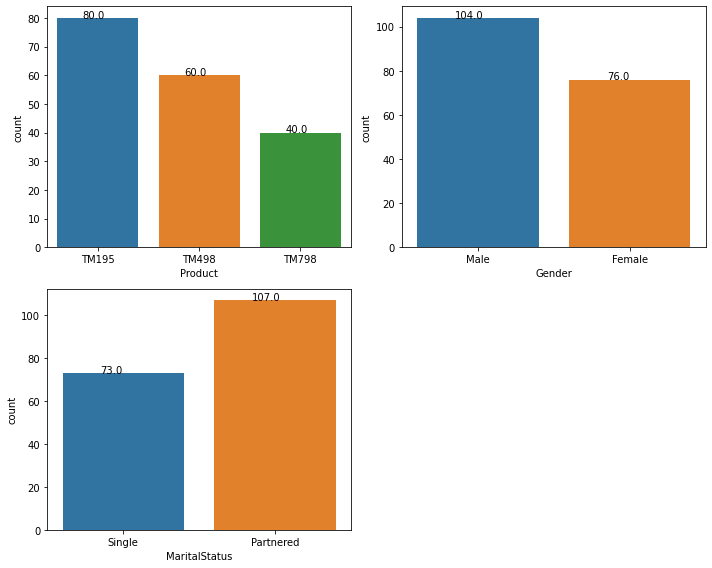

In [15]:
plt.figure(1)
plt.figure(figsize=(10,8))

plt.subplot(221)
ax1=sns.countplot(x="Product",data=cardio)
for p in ax1.patches:
   ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.subplot(222)
ax2=sns.countplot(x="Gender",data=cardio)
for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.subplot(223)
ax3=sns.countplot(x="MaritalStatus",data=cardio)
for p in ax3.patches:
   ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


plt.tight_layout()
plt.show()

- Model TM195 was sold the most
- There are more male buyers then female buyers.
- Couples are buying more tradmills then singles.

In [16]:
# Descriptive Analysis
cardio.describe().T

count          mean           std      min       25%      50%  \
Age        180.0     28.788889      6.943498     18.0     24.00     26.0   
Education  180.0     15.572222      1.617055     12.0     14.00     16.0   
Usage      180.0      3.455556      1.084797      2.0      3.00      3.0   
Fitness    180.0      3.311111      0.958869      1.0      3.00      3.0   
Income     180.0  53719.577778  16506.684226  29562.0  44058.75  50596.5   
Miles      180.0    103.194444     51.863605     21.0     66.00     94.0   

                75%       max  
Age           33.00      50.0  
Education     16.00      21.0  
Usage          4.00       7.0  
Fitness        4.00       5.0  
Income     58668.00  104581.0  
Miles        114.75     360.0

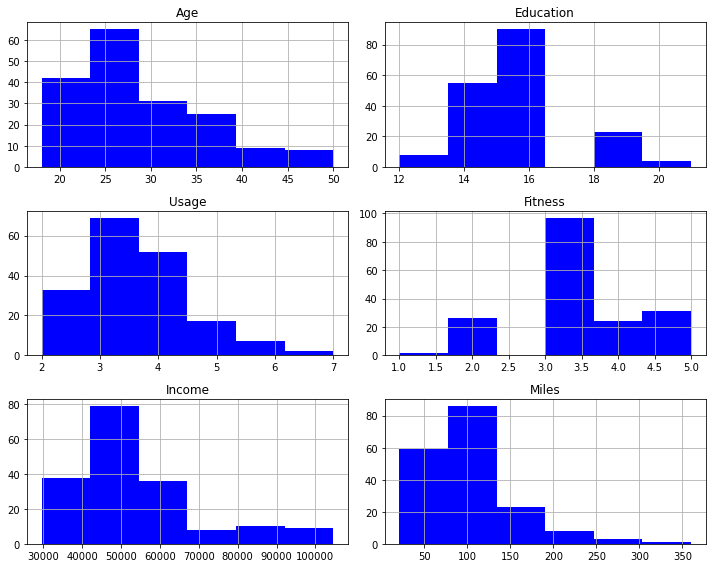

In [17]:
cardio[['Age','Education','Usage','Fitness','Income',"Miles"]].hist(figsize=(10,8),bins=6,color='Blue')
plt.tight_layout()
plt.show()

In [18]:
def plot_uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [19]:
num_cols = cardio.select_dtypes('int64').columns.values
num_cols

array(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles'],
      dtype=object)

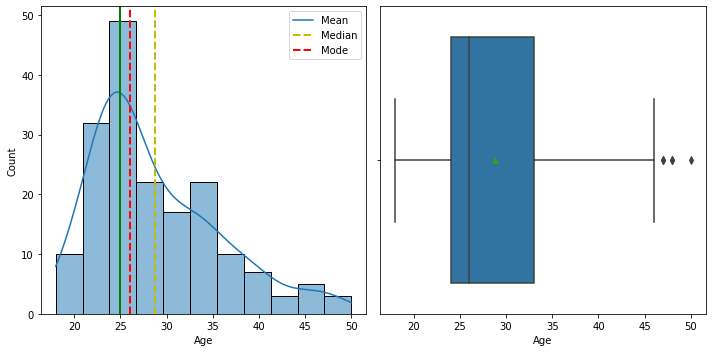

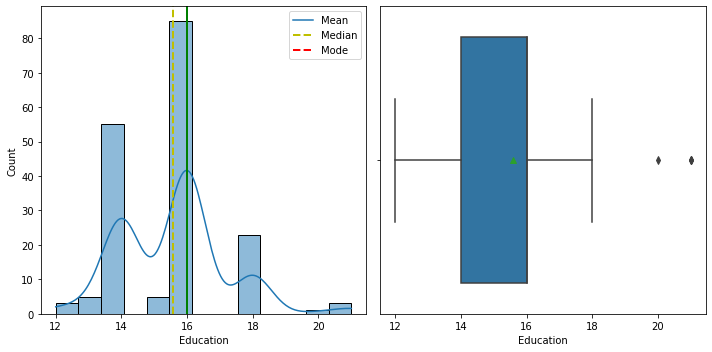

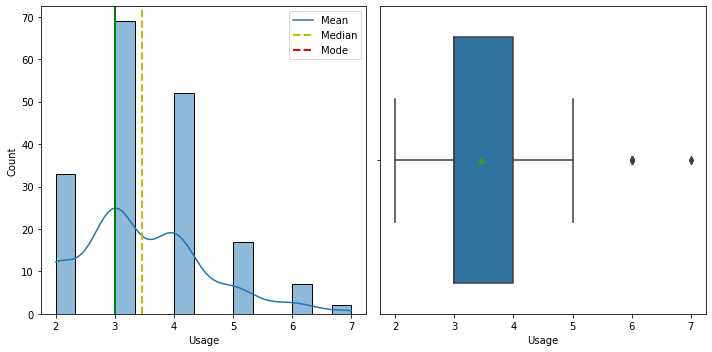

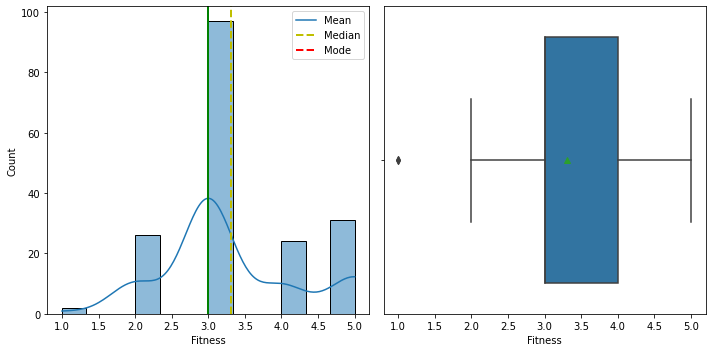

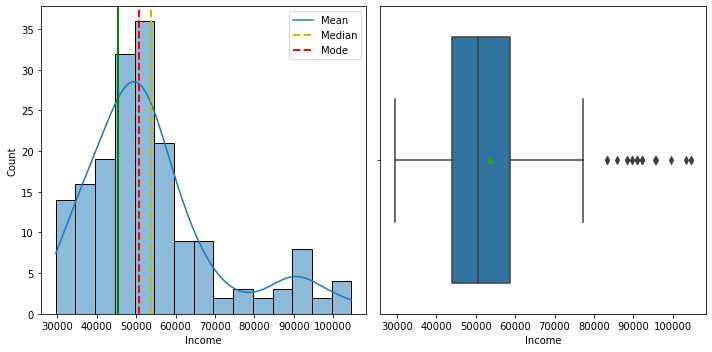

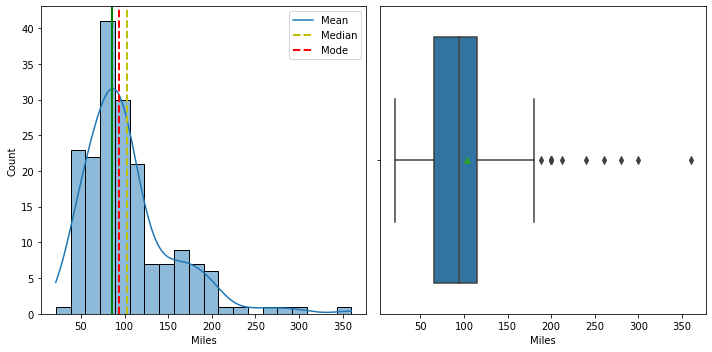

In [20]:
for f in num_cols:
    plot_uni(cardio[f])

<br>
<b> Age</b>
<br>
- Age is skewed towards right.<br>
- Customers buying treadmill after age of 40 and before 20 are very less.<br>
<br>
<b> Education</b>
<br>
- Most customers have 16 years of Education.<br>
- There are few outliers (higher end).<br>
<br>
<b>Usage</b>
<br>
- Most user loves to use Treadmills 3-4 times/week.<br>
- There are few outliers (higher end).<br>
<br>
<b> Fitness</b>
<br>
- Most customer have 3-3.5 fitness rating (moderate fit).<br>
- Very few customers that uses treadmill have low score i.e 1.<br>
<br>
<b>Income</b>
<br>
- Income is skewed toward right.<br>
- Income may have outliers (higher end) as there are very few persons who earn >80k.<br>
- Most customers have income less than 70k.<br>
<br>
<b>Miles</b>
<br>
- Miles is skewed towards right.<br>
- Customers run on an average 80 miles per week.<br>
- There are some outliers, where customers are expecting to run more than 200 miles per week<br>

### Bivariate analysis (analysis of more tha one group together)

In [21]:
cardio.groupby(by='Product')[['Age','Income']].mean() ##Average age and income of buying product models

Age     Income
Product                  
TM195    28.55  46418.025
TM498    28.90  48973.650
TM798    29.10  75441.575

Product  Gender
TM195    Female    40
         Male      40
TM498    Female    29
         Male      31
TM798    Female     7
         Male      33
dtype: int64


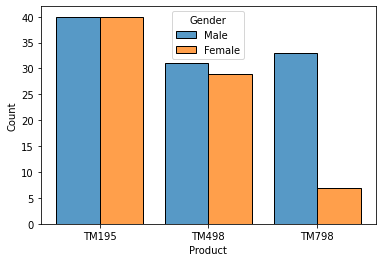

In [22]:
## models bought by different Genders
print(cardio[['Product','Gender']].value_counts().sort_index())
sns.histplot(x='Product',data=cardio, hue='Gender',multiple="dodge", shrink=.8)
plt.show()

Product  MaritalStatus
TM195    Partnered        48
         Single           32
TM498    Partnered        36
         Single           24
TM798    Partnered        23
         Single           17
dtype: int64


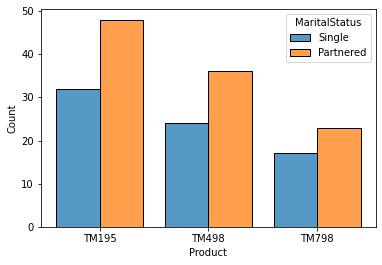

In [23]:
## models bought by single vs couples
print(cardio[['Product','MaritalStatus']].value_counts().sort_index()) 
sns.histplot(x='Product',data=cardio, hue='MaritalStatus', multiple="dodge", shrink=.8)
plt.show()

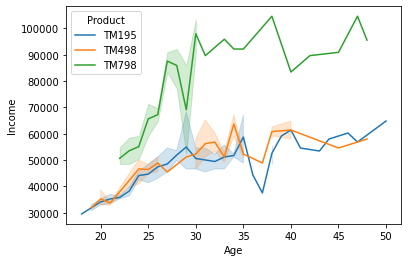

In [24]:
sns.lineplot(x='Age',y='Income',  data=cardio,  hue='Product')
plt.show()

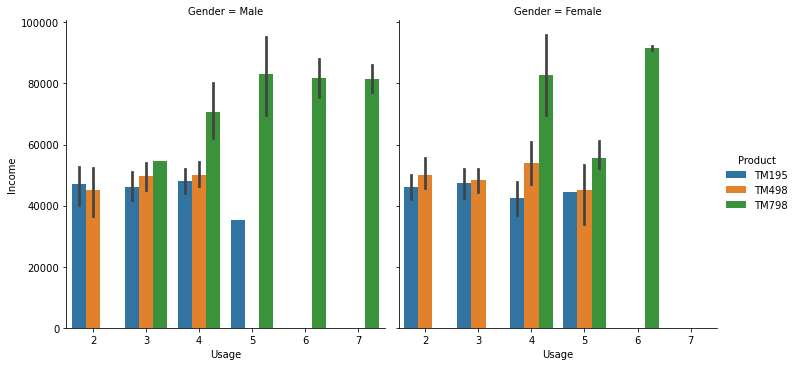

In [25]:
sns.catplot(x='Usage', y='Income', col='Gender',hue='Product' ,kind="bar", data=cardio)
plt.show()

- Customers having lower income range (<60K) prefer to buy models TM195 & TM498 and expect to use treadmill 2-5 times/week.
- Mostly Higher earning customers bought TM798 and expect to use treadmill 4-6 times/week

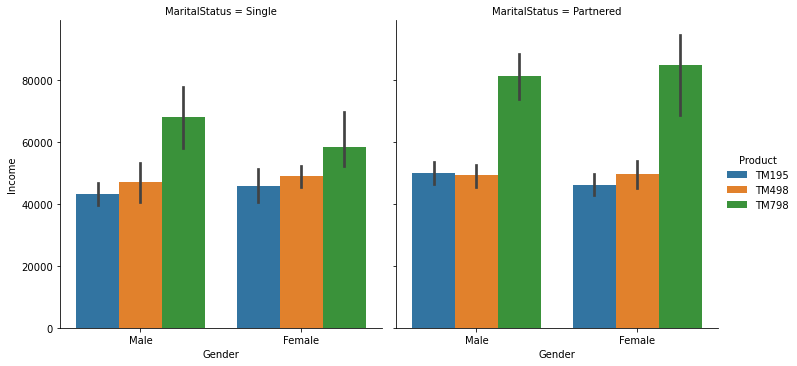

In [26]:
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=cardio,kind='bar')
plt.show()

- Partnered Female bought TM195 Model compared to Partnered male.
- Partnered Male customers bought TM498 & TM798 models more than Single Male customers.
- Single Female customers bought TM498 model more than Single male customers.
- Single Male customers bought TM195 & TM798 models compared to Single females.
- The majority of treadmill buyers are man

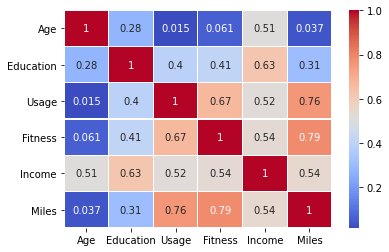

In [27]:
sns.heatmap(data=cardio.corr(method="pearson"),cmap="coolwarm", annot=True ,linewidths=0.2, linecolor='white')
plt.show()            

- Education and Income are Significantly correleated
- Age,Education,Usage,Fitness & Miles has significant correlation with Income and vice versa.(>0.5)
- usage and fitness are significantly correlated with each other.
- Usage and Fitness are highly correlated with Miles and vice versa

## Analysis of EDA :

#### Final Observation
- TM195 model is the most purchased model (44.4%) then TM498 (33.3%). TM798 is the least sold model (22.2%).
- There are more Male customers (57.8%) than Female customers (42.2%).
- Average Usage of Males is more than Average usage of Females.
- Customers buying treadmill are younger and average age of customer is 28.
- Most of the customers earns less than 70K and prefer TM195 & TM498 models.
- 59.4% of the customers who purchased treadmill are partnered.
- Customers average education is 16.
###### Customer Profiles
1. <b>For model TM195</b>
- Customers who bought this treadmill have income less than 60k with an average of 55K.
- This model has same level of popularity in Male customers as well as Female customers as it has same numbers of Male and Female customers.
- Average age of customer who purchases TM195 is 28.5.
- This model is popular among Bachelors as average years of education of customers for this product is 15.
- Self rate fitness level of customer is average.
- Customers expect to use this treadmill 3-4 times a week.
- It is the most popular model (in all genders) because of its appealing price and affordability with 33.3% of sales.
- Customers who bought this treadmill want fitness level atleast average and maybe they were looking for a basic treadmill with appealing price that also does the job.
2. <b>For model TM498</b>
- This model is second most sold model with 33.3% of sales.
- Customers with lower income purchase TM195 and TM498 model may be because of lower cost of the Treadmill.
- Average age of customer who purchases TM498 is 29.
- This model is popular among Bachelors as average years of education of customers for this product is 16.
- Customers expecting TM498 model to use less frequently but to run more miles per week on this.
- This model is popular more in Single Female customers compare to Single male customers may be because of difference in provided features or color scheme.
3. <b> For model TM798</b>
- This is the least sold product(22.2% sales) in company lineup of Treadmill may be because of it heafty price range making it Company's Premium product.
- This model is popular with customers having high income range as average Income is 75K .
- Average age of customer who purchases TM798 is 29.
- This model is popular among Customers with higher education as average education is 17 years.
- Treadmill may have some advanced features as people with high income are ready to spend money to buy this model
- Customers expected usage on this model is 4-5 day a week with moderate Miles to run having average 166 miles per week.
- Male customers who are more serious about fitness or Professionals buy this mode (self fitness rating 3-5)

In [28]:
from pandas_profiling import ProfileReport

In [29]:
ProfileReport(cardio)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Feature Engineering :

In [30]:
cardio.Product=cardio["Product"].astype("category")
cardio.Gender=cardio["Gender"].astype("category")
cardio.MaritalStatus=cardio["MaritalStatus"].astype("category")

In [31]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


###### Label Encoding for categorical values 

In [32]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
cardio['MaritalStatus']=label_enc.fit_transform(cardio['MaritalStatus'])
cardio.head()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  \
0   TM195   18    Male         14              1      3        4   29562   
1   TM195   19    Male         15              1      2        3   31836   
2   TM195   19  Female         14              0      4        3   30699   
3   TM195   19    Male         12              1      3        3   32973   
4   TM195   20    Male         13              0      4        2   35247   

   Miles  
0    112  
1     75  
2     66  
3     85  
4     47

- single : 1 
- couple : 0 

In [33]:
cardio['Gender']=label_enc.fit_transform(cardio['Gender'])
cardio.head()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  \
0   TM195   18       1         14              1      3        4   29562   
1   TM195   19       1         15              1      2        3   31836   
2   TM195   19       0         14              0      4        3   30699   
3   TM195   19       1         12              1      3        3   32973   
4   TM195   20       1         13              0      4        2   35247   

   Miles  
0    112  
1     75  
2     66  
3     85  
4     47

- Male: 1
- Female : 0

In [34]:
cardio['Product']=label_enc.fit_transform(cardio['Product'])
cardio.tail()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  \
175        2   40       1         21              1      6        5   83416   
176        2   42       1         18              1      5        4   89641   
177        2   45       1         16              1      5        5   90886   
178        2   47       1         18              0      4        5  104581   
179        2   48       1         18              0      4        5   95508   

     Miles  
175    200  
176    200  
177    160  
178    120  
179    180

In [35]:
cardio.head()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  \
0        0   18       1         14              1      3        4   29562   
1        0   19       1         15              1      2        3   31836   
2        0   19       0         14              0      4        3   30699   
3        0   19       1         12              1      3        3   32973   
4        0   20       1         13              0      4        2   35247   

   Miles  
0    112  
1     75  
2     66  
3     85  
4     47

#### Dividing Dataset Into Traion and Test Data:

In [36]:
X = cardio.drop("Product" , axis=1)
y = cardio["Product"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

[[13  1  1]
 [ 3  7  0]
 [ 1  3  7]]
Accuracy of  Decision Tree Classifier :  75.0


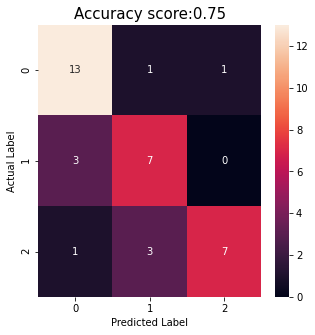

In [39]:
#Import Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)
#from sklearn.metrics import classification_report
#print("Classification report-\n",classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,annot=True)
plt.ylabel('Actual Label')
plt.xlabel("Predicted Label")
all_sample_title="Accuracy score:{0}".format(model.score(X_test,y_test))
plt.title(all_sample_title,size=15)
accuracy_score(y_test, y_pred)
# Calculate Model accuracy by comparing y_test and y_pred
acc_dtree = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree )

### Vizualization of Decision Tree :

In [46]:
from sklearn import tree

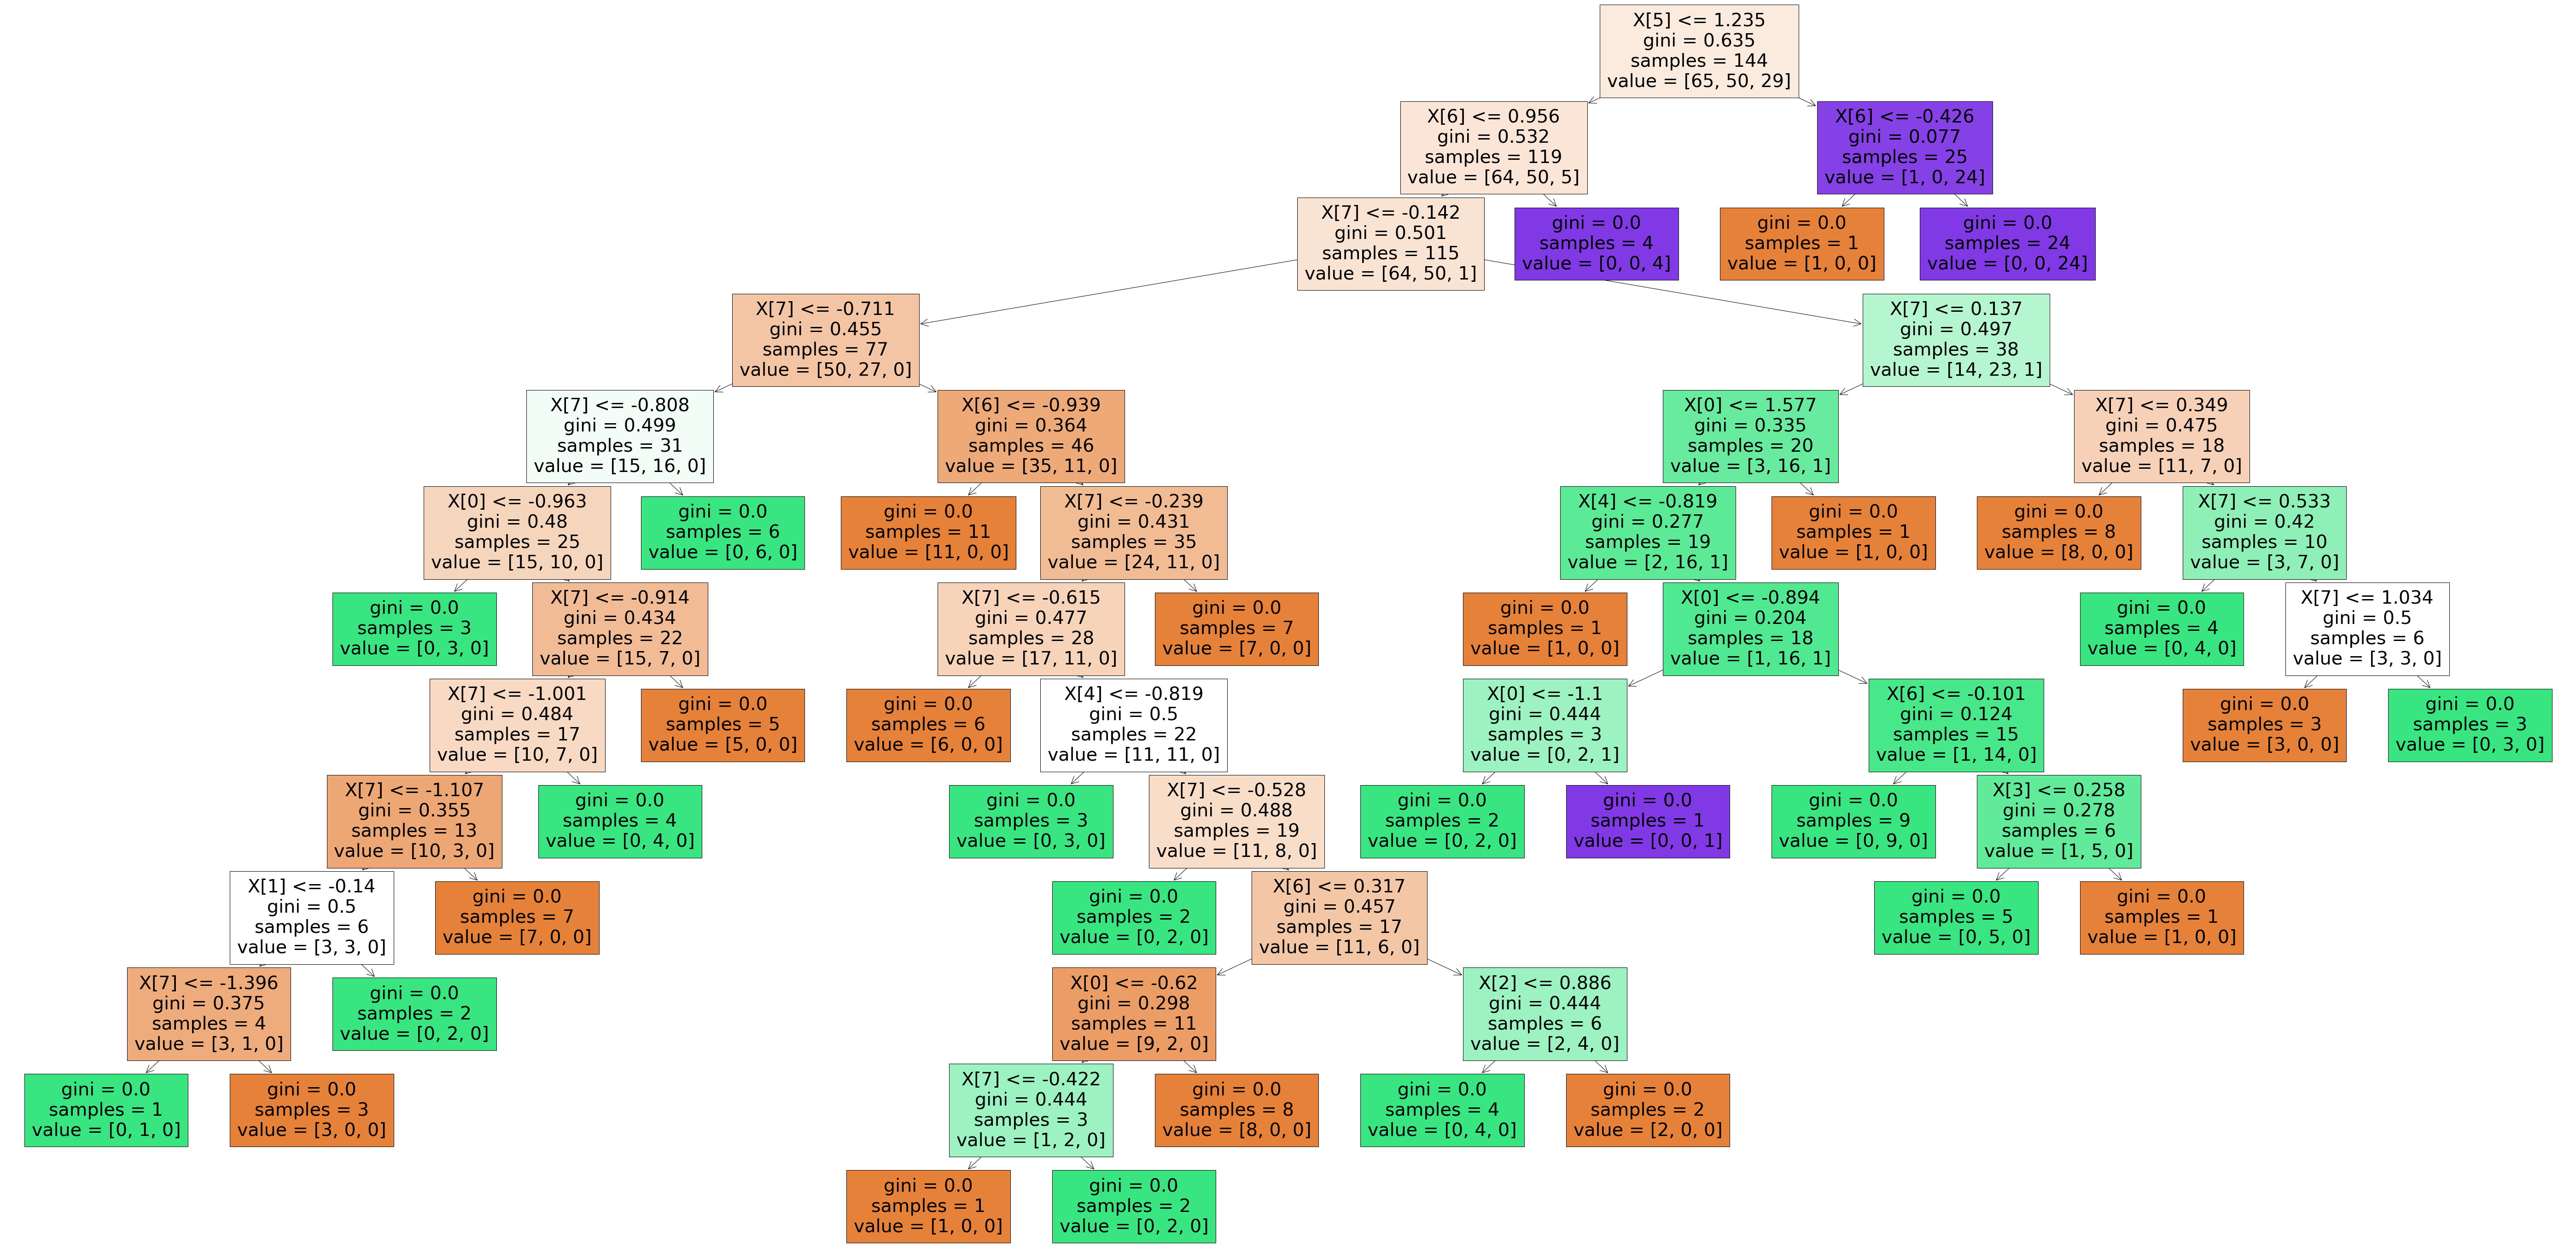

In [54]:
fig = plt.figure(figsize=(100,50))
plot_tree= tree.plot_tree(model,filled=True,max_depth=15)

In [62]:
fig.savefig("decision_tree.png")

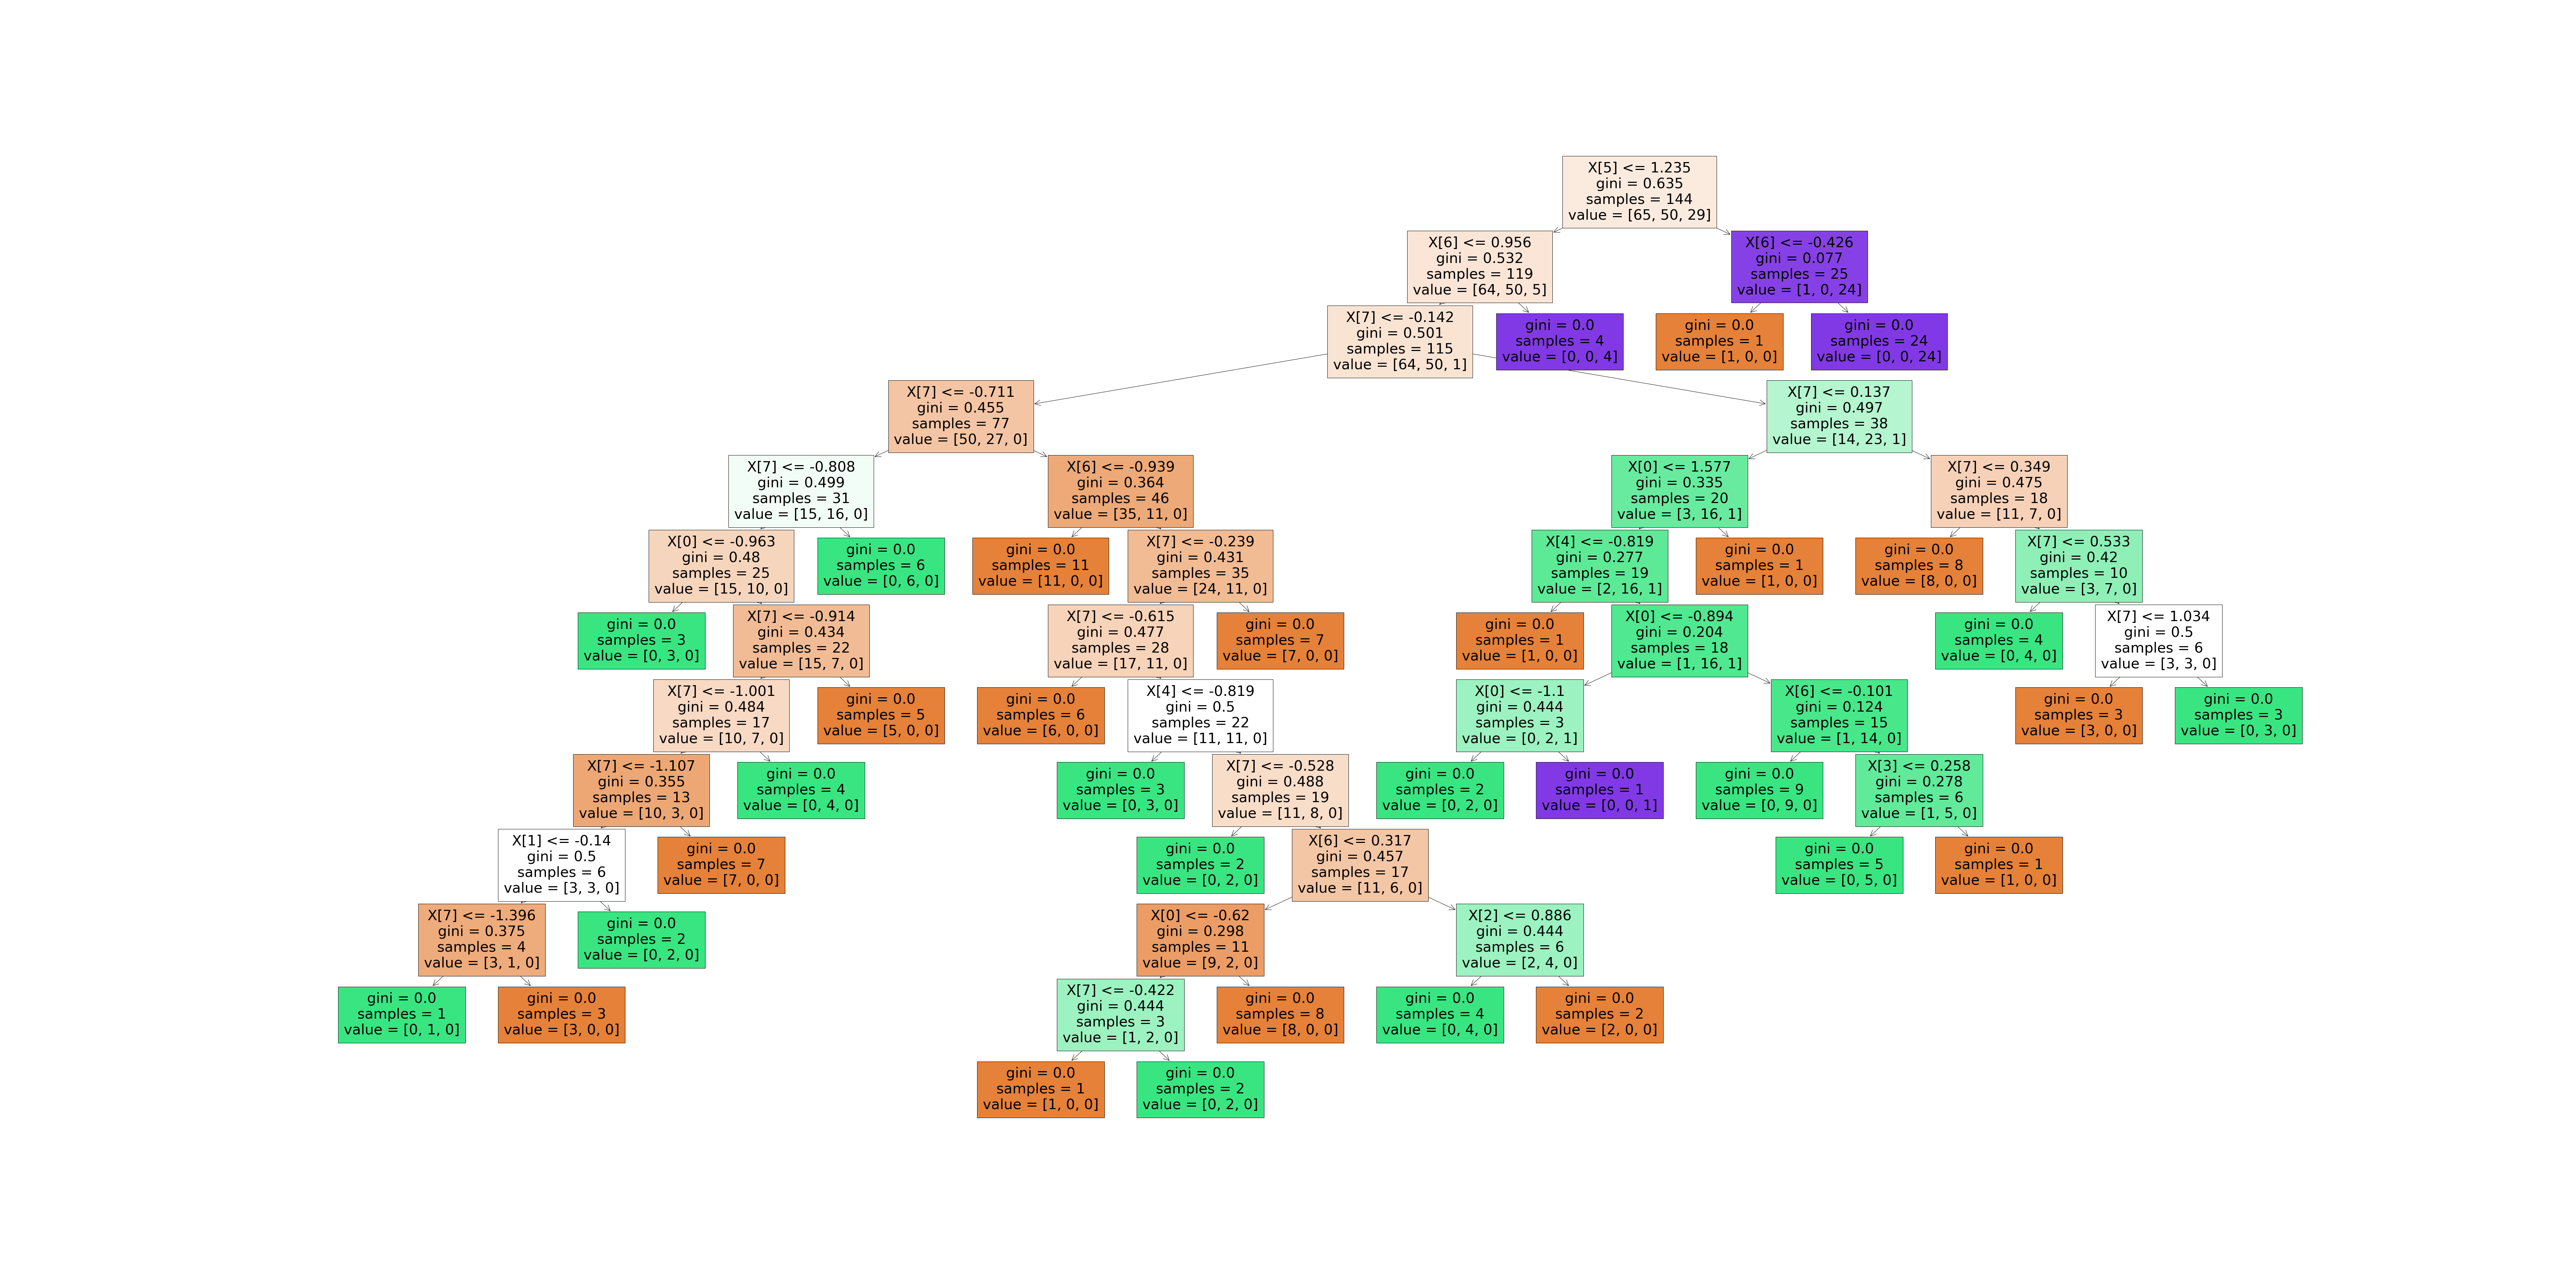